In [1]:
# Team Annihilators- MehulKumar Patel,Dhiraj Patel
# Emails: dhiru474@gmail.com,mkpatel.p64@gmail.com
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skillsay-ai-crickethon-dataset/matches.csv
/kaggle/input/skillsay-ai-crickethon-dataset/deliveries.csv


In [2]:
matches = pd.read_csv('/kaggle/input/skillsay-ai-crickethon-dataset/matches.csv')
deliveries = pd.read_csv('/kaggle/input/skillsay-ai-crickethon-dataset/deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## *Dealing with Null values*

In [5]:
matches.isnull().sum().sort_values(ascending = False)


umpire3            637
city                 7
player_of_match      4
winner               4
umpire1              2
umpire2              2
toss_winner          0
season               0
date                 0
team1                0
team2                0
result               0
toss_decision        0
dl_applied           0
win_by_runs          0
win_by_wickets       0
venue                0
id                   0
dtype: int64

In [6]:
## Umpire3 has 637 nan values and is not required hence we need to drop it.
matches.drop(['umpire3'], inplace = True, axis = 1)

In [7]:
matches.isnull().sum().sort_values(ascending = False)

city               7
player_of_match    4
winner             4
umpire2            2
umpire1            2
toss_winner        0
season             0
date               0
team1              0
team2              0
result             0
toss_decision      0
dl_applied         0
win_by_runs        0
win_by_wickets     0
venue              0
id                 0
dtype: int64

In [8]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [9]:
## By venue it is clear that this null values in city column is of DUBAI hence replacing it with same.
matches['city'] = matches['city'].fillna("DUBAI")

In [10]:
matches.isnull().sum().sort_values(ascending = False)

player_of_match    4
winner             4
umpire2            2
umpire1            2
toss_winner        0
season             0
city               0
date               0
team1              0
team2              0
result             0
toss_decision      0
dl_applied         0
win_by_runs        0
win_by_wickets     0
venue              0
id                 0
dtype: int64

In [11]:
matches[pd.isnull(matches['player_of_match'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [12]:
## For no result no player of match has been assigned hence replacing it with none
matches['player_of_match'] = matches['player_of_match'].fillna("None")

In [13]:
matches.isnull().sum().sort_values(ascending = False)

winner             4
umpire2            2
umpire1            2
toss_winner        0
season             0
city               0
date               0
team1              0
team2              0
result             0
toss_decision      0
dl_applied         0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
id                 0
dtype: int64

In [14]:
## Replacing the null values in winner column with draw.
matches['winner'] = matches['winner'].fillna("DRAW")

In [15]:
matches.isnull().sum().sort_values(ascending = False)

umpire2            2
umpire1            2
toss_decision      0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
id                 0
dtype: int64

In [16]:
#Fix null for column - umpire1
matches['umpire1'].value_counts() 

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SJA Taufel          1
Sundaram Ravi       1
A Nanda Kishore     1
Ulhas Gandhe        1
SL Shastri          1
Name: umpire1, Length: 61, dtype: int64

In [17]:
## Replacing umpire1 nan values with highest frequency umpire
matches['umpire1'] = matches['umpire1'].fillna('HDPK Dharmasena')

In [18]:
matches.isnull().sum().sort_values(ascending = False)

umpire2            2
toss_decision      0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
result             0
umpire1            0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
id                 0
dtype: int64

In [19]:
matches['umpire2'].value_counts() 

C Shamshuddin    57
S Ravi           57
SJA Taufel       54
RJ Tucker        38
CK Nandan        36
                 ..
JD Cloete         1
Subroto Das       1
Ian Gould         1
SD Fry            1
Nand Kishore      1
Name: umpire2, Length: 65, dtype: int64

In [20]:
## Replacing umpire2 nan values with highest frequency umpire
matches['umpire2'] = matches['umpire2'].fillna('SJA Taufel')

In [21]:
matches.isnull().sum().sort_values(ascending = False)

umpire2            0
toss_decision      0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
result             0
umpire1            0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
id                 0
dtype: int64

In [22]:
## Drop duplicates from team1 & team2 columns
(matches['team2'].value_counts() + matches['team1'].value_counts()).drop_duplicates().index[::1]

Index(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'],
      dtype='object')

In [23]:
## Replace Delhi Daredevils with Delhi capitals as the franchise is same
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)

## The following dataset contains multiple name for RPS team so changing all of them to a single distinct name

matches.team1.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'},regex=True,inplace=True)
matches.toss_winner.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'},regex=True,inplace=True)

matches.team1.replace({'Rising Pune Supergiantss' : 'Rising Pune Supergiants'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiantss' : 'Rising Pune Supergiants'},regex=True,inplace=True)
matches.toss_winner.replace({'Rising Pune Supergiantss' : 'Rising Pune Supergiants'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiantss' : 'Rising Pune Supergiants'},regex=True,inplace=True)

In [24]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel


# Check for HeatMaps:
The Heat Map procedure shows the distribution of a quantitative variable over all combinations of 2 categorical factors. If one of the 2 factors represents time, then the evolution of the variable can be easily viewed using the map. A gradient color scale is used to represent the values of the quantitative variable. The correlation between two random variables is a number that runs from -1 through 0 to +1 and indicates a strong inverse relationship, no relationship, and a strong direct relationship, respectively.

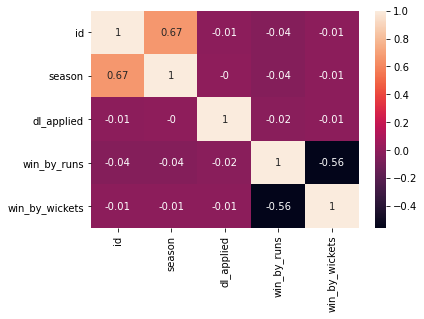

In [25]:
import seaborn as sns
corelation_matrix=matches.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

# Label Encoding

In [26]:
## Using Label encoding to convert categorical values (Teams) to numbers.
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','GL','KXIP','SRH','RPS','KTK','PW','DCC'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DCC':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DCC':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DCC':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'GL':7,'KXIP':8,'SRH':9,'RPS':10,'KTK':11,'PW':12,'DCC':13,'DRAW':14}}
matches.replace(encode, inplace=True)

In [27]:
## Encoding winner column to numbers based on above assigned values.
dicVal = encode['winner']

In [28]:
## Creating a new Dataframe with required columns
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,9,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",9
1,1,10,Pune,field,10,Maharashtra Cricket Association Stadium,10


In [29]:
from sklearn.preprocessing import LabelEncoder
label_coder= LabelEncoder()
matches['Venue'] =label_coder.fit_transform(matches["venue"])
matches

,team1,team2,city,toss_decision,toss_winner,venue,winner,Venue
0,9,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",9,28
1,1,10,Pune,field,10,Maharashtra Cricket Association Stadium,10,21
2,7,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2,31
3,10,8,Indore,field,8,Holkar Cricket Stadium,8,13
4,3,13,Bangalore,bat,3,M Chinnaswamy Stadium,3,17
...,...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1,40
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1,18
753,9,13,Visakhapatnam,field,13,ACA-VDCA Stadium,13,0
754,13,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5,0


## *Importing all the algorithms for determining the prediction & accuracy*

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## *Creating a general model function to predict the accuracy of model using different algorithms*

In [31]:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_splits=7)
  error = []
  model.fit(data[predictors],data[outcome])

In [32]:
## Calling the function
print('Gaussian Naive Bayes')
model = GaussianNB()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'Venue', 'toss_winner']
classification_model(model,matches,predictor_var,outcome_var)
print('Logisitc Regression')
model = LogisticRegression()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'Venue', 'toss_winner']
classification_model(model,matches,predictor_var,outcome_var)
print('Support Vector Machine')
model = SVC(gamma= 'auto')
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'Venue', 'toss_winner']
classification_model(model,matches,predictor_var,outcome_var)
print('Decision Tree')
model = DecisionTreeClassifier()
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'Venue', 'toss_winner']
classification_model(model,matches,predictor_var,outcome_var)

Gaussian Naive Bayes
Accuracy : 32.275%
Logisitc Regression
Accuracy : 26.587%
Support Vector Machine
Accuracy : 78.571%
Decision Tree
Accuracy : 87.302%


## *Highest accuracy achieved by Decision Tree classifier with 87.3% accuracy and second highest with 78.5% accuracy using Support Vector Machine algorithm.*